In [1]:
import numpy as np
import laserhockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
import time
import torch
import DDPG
import TD3
import os
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm
import pickle

In [2]:
def moving_average(data, win_size):
    data = np.asarray(data)
    averages = []
    for i in range(len(data)-win_size):
        averages.append(np.sum(data[i:i+win_size])/win_size)
    return averages

def fixed_moving_average(data, win_size):
    data = np.asarray(data)
    averages = []
    for i in range(len(data)):
        averages.append(np.sum(data[i-min(i,win_size):i])/min(i,win_size))
    return averages

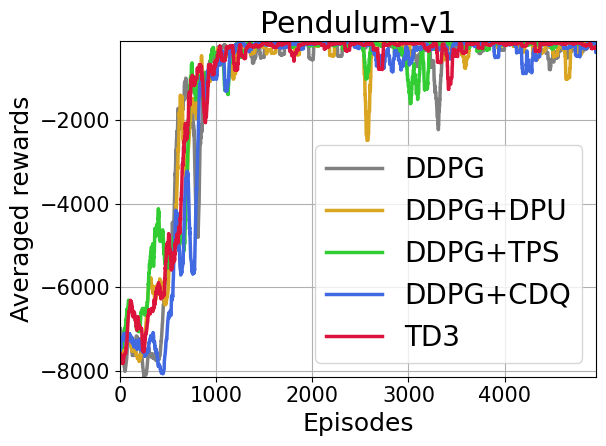

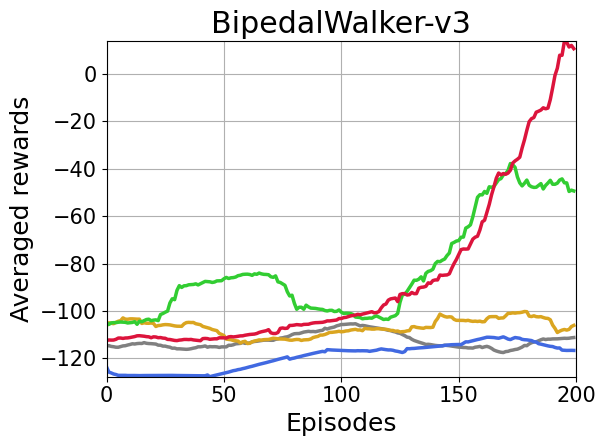

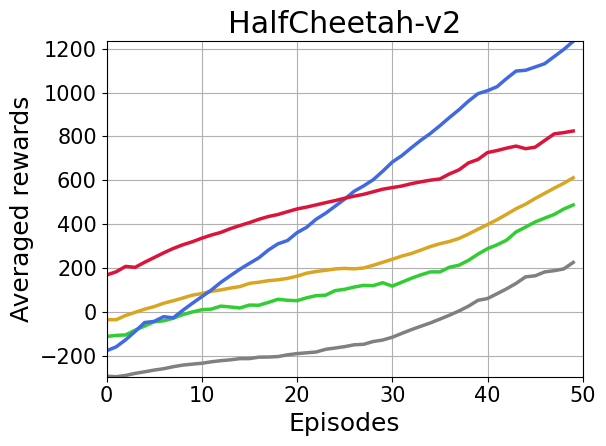

In [10]:
font = {'size'   : 18}

matplotlib.rc('font', **font)
envs = ["pendulum", "walker", "cheetah"]
envs_labels = ["Pendulum-v1", "BipedalWalker-v3", "HalfCheetah-v2"]
for ee, env in enumerate(envs):
    mode = "normal"
    name = "agentcompare"
    rewards = []
    losses = []
    #agents = ["TD3"]
    agents = ["DDPG", "DPU", "TPS", "CDQ", "TD3"]
    labels = ["DDPG", "DDPG+DPU", "DDPG+TPS", "DDPG+CDQ", "TD3"]
    colors = ["gray", "goldenrod", "limegreen", "royalblue", "crimson"]
    avg = 50
    for agent_type in agents:
        filename = f'./results/{agent_type}_{env}_{name}_{mode}_train_stats.pkl'
        with (open(filename, "rb")) as openfile:
            loaded_stats = pickle.load(openfile)
            #print(loaded_stats["Experiment setup"])
            #print(loaded_stats["Rewards"])
            rewards.append(moving_average(loaded_stats["Rewards"],avg))
            #losses.append(moving_average(loaded_stats["losses"][0][loaded_stats["losses"][0]!= np.array(None)],150))
    rewards = np.asarray(rewards)
    xticks = [0, len(rewards[0])/2, len(rewards[0])]
    fig, ax = plt.subplots()
    fig.figsize=((5,5))
    for ii, r in enumerate(rewards):
        ax.plot(r, label=labels[ii], lw=2.5, c=colors[ii])
    ax.grid()
    #ax.set_xticks(xticks)
    ax.set_xlim(0, rewards.shape[1])
    ax.set_ylim(np.min(rewards), np.max(rewards))
    ax.set_title(envs_labels[ee])
    ax.set_xlabel("Episodes")
    ax.set_ylabel("Averaged rewards")
        
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    if ee==0:
        plt.legend(prop={'size' : 20})
    if not os.path.exists("figures"):
        os.makedirs("figures")
    plt.tight_layout()
    plt.savefig(f"figures/{env}", dpi='figure')

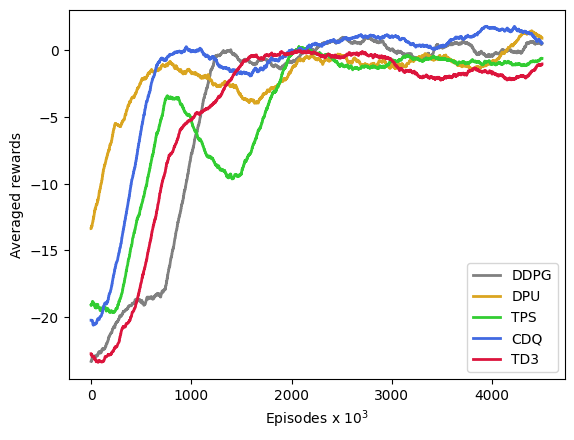

In [11]:
env = "hockey"
mode = "weak"
rewards = []
losses = []
agents = ["DDPG", "DPU", "TPS", "CDQ", "TD3"]
colors = ["gray", "goldenrod", "limegreen", "royalblue", "crimson"]
for agent_type in agents:
    filename = f'./results/{agent_type}_{env}_agentcompare_{mode}_train_stats.pkl'
    with (open(filename, "rb")) as openfile:
        loaded_stats = pickle.load(openfile)
        rewards.append(moving_average(loaded_stats["Rewards"],500))
        #losses.append(moving_average(loaded_stats["losses"][0][loaded_stats["losses"][0]!= np.array(None)],150))
fig,ax = plt.subplots()
fig.figsize=((1,1))
for ii, r in enumerate(rewards):
    ax.plot(r, label=agents[ii], lw=2, c=colors[ii])
ax.set_xlabel("Episodes x $10^{3}$")
ax.set_ylabel("Averaged rewards")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


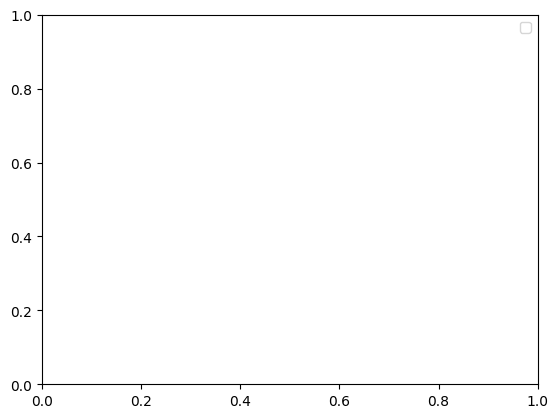

In [4]:
agent = "TD3Agent"
env = "hockey"
mode = "normal"
ids = []
rewards = []
for iter in [10,20,50]:
    for up_ev in [2,5,10]:
        if iter==50 and up_ev==10:
            break
        name = f"iter{iter}_up_ev{up_ev}"
        with (open(f"results/{agent}_{env}_{name}_{mode}_train_stats.pkl", "rb")) as openfile:
            loaded_stats = pickle.load(openfile)
            rewards.append(moving_average(loaded_stats["Rewards"],500))
            ids.append(f'iter{iter}   up_ev{up_ev}')

for ii, r in enumerate(rewards):
    ax.plot(r, label=ids[ii])
ax.set_xlabel("Episodes x $10^{3}$")
ax.set_ylabel("Averaged rewards")
plt.legend()